In [1]:
# load required packages
import networkx as nx
import osmnx as ox
import pandas as pd
import numpy as np
import folium
import geopy.distance
import random
from IPython.display import IFrame
ox.config(log_console=True, use_cache=True)

In [2]:
# import the graph
filepath = 'champaign_processed.graphml'
G = ox.load_graphml(filepath)
for i in G.nodes:
    Neighbour = list(G.neighbors(i))
    for item in Neighbour:
        route = nx.shortest_path_length(G,i,item,weight = 'length')
        if route <=10 and G.nodes[i]['pop_score_block'] != -1:
            G.nodes[item]['pop_score_block'] = -1
 #change data types of some attributes
DePop = []
for i in G.nodes:
    if G.nodes[i]['pop_score_block'] == -1:
        G.nodes[i]['pop_score_block'] = 0
        DePop.append(i)
for _,data in G.nodes(data=True):
    data['pop_score_tract'] = float(data['pop_score_tract'])
    data['pop_score_block'] = float(data['pop_score_block'])    

In [3]:
nx.is_strongly_connected(G) 

True

In [5]:
# create a dictionary for all possible routs
node_ID = list(G.nodes())
path_lengths = dict(nx.all_pairs_dijkstra_path_length(G, weight='distance')) 

In [28]:
facility = random.choice(node_ID)
score_old = 0

In [ ]:
# initialize by placing all facilities in the node with highest centriality
extended_stats = ox.extended_stats(G, ecc=False, bc=True, cc=False)
startN,dump = max(extended_stats['betweenness_centrality'].items(), key=lambda x: x[1])
# start with all facility at startN
# initialize a few parameters before running
facility = startN 
score_old = 0

In [29]:
for i in node_ID:
    path = path_lengths[facility][i]
    score_old = score_old+path*G.nodes[i]['pop_score_block']
score_old

18940.74041372356

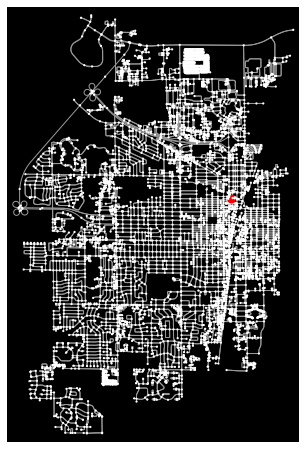

In [30]:
# visualize initial input
nc = ['r' if node in [facility] else 'w' for node in G.nodes()]
ns = [80 if node in [facility] else 5 for node in G.nodes()]
fig, ax = ox.plot_graph(G, node_size=ns, node_color=nc, node_zorder=2, bgcolor='k')

In [31]:
facility

6805581080

In [32]:
# loop through each facility, until there is no better score 
score_new = score_old-1
count = 0
while score_new < score_old:
    score_old = score_new
    count += 1
    score_new = 0
    neigh = []
    neigh = list(G.neighbors(facility))
    temp = facility
    TEMP_SCORE = []
    for item in neigh:
        temp_score = 0
        for j in node_ID:
            path = path_lengths[item][j] 
            temp_score = temp_score+path*G.nodes[j]['pop_score_block']
        TEMP_SCORE.append(temp_score)
    score_new = min(TEMP_SCORE)
    step_dir = neigh[TEMP_SCORE.index(score_new)]
    facility = step_dir
print(score_new)
print(count)
# Actual location of facilities
print(facility)

15937.404137235091
18
7071906155


In [33]:
score_old

15920.981584258312

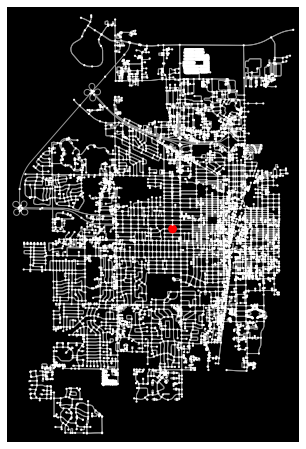

In [27]:
# visualize initial input
nc = ['r' if node in [facility] else 'w' for node in G.nodes()]
ns = [80 if node in [facility] else 5 for node in G.nodes()]
fig, ax = ox.plot_graph(G, node_size=ns, node_color=nc, node_zorder=2, bgcolor='k')